In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.shape

(1061, 7)

In [4]:
df.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [6]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [8]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [9]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [10]:
df['ex_showroom_price'].isnull().sum()/len(df['ex_showroom_price'])

0.40999057492931196

In [11]:
df['ex_showroom_price'].value_counts()

50267.0     23
85011.0     20
54605.0     15
74295.0     14
78712.0     12
            ..
129662.0     1
66697.0      1
69983.0      1
76632.0      1
32000.0      1
Name: ex_showroom_price, Length: 230, dtype: int64

In [12]:
df['ex_showroom_price']

0            NaN
1            NaN
2       148114.0
3        89643.0
4            NaN
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [13]:
df['ex_showroom_price'].notnull().sum()

626

In [14]:
df.loc[df['ex_showroom_price'].notnull()] = df.loc[df['ex_showroom_price'].notnull()]

In [15]:
df['ex_showroom_price']

0            NaN
1            NaN
2       148114.0
3        89643.0
4            NaN
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [16]:
df[df.duplicated()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
231,TVS Apache RTR 200 4V,95000,2018,Individual,1st owner,9600,NaN
508,Bajaj Pulsar 135 LS,20000,2010,Individual,1st owner,80000,64589.0
522,Bajaj Platina 100,20000,2012,Individual,1st owner,16295,NaN
605,Hero Karizma [2003-2014],50000,2013,Individual,1st owner,38000,85766.0
607,Honda CB Hornet 160R,70000,2017,Individual,1st owner,35000,87719.0
773,Honda Activa [2000-2015],23000,2009,Individual,1st owner,95000,50267.0


In [17]:
df.drop_duplicates()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [18]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [19]:
df['brand'] = df['name'].apply(lambda x : x.split()[0])

In [20]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,brand
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,Royal
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,Honda
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,Royal
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,Yamaha
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,Yamaha
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,Activa
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,Honda
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,Bajaj
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,Honda


In [21]:
df.corr()

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


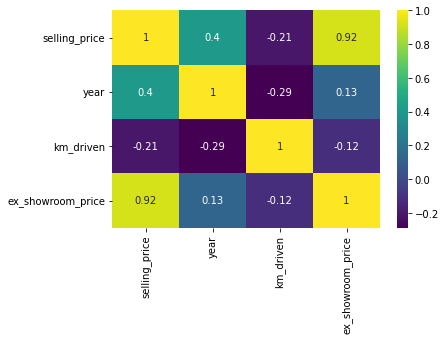

In [22]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', linecolor = 'green')
plt.style.use('classic')

In [23]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'brand'],
      dtype='object')

In [24]:
df['name'].value_counts().head(15)

Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
Royal Enfield Thunderbird 350    19
Hero Honda Splendor Plus         17
Bajaj Discover 125               16
Yamaha FZ S V 2.0                16
Honda Activa 3G                  15
Honda Shine                      15
Honda CB Unicorn 150             14
TVS Apache RTR 160               14
Bajaj Pulsar 135 LS              13
Honda Activa 5G                  12
Name: name, dtype: int64

In [25]:
df['selling_price'].value_counts().head(15)

25000     77
35000     66
50000     63
40000     63
30000     62
45000     56
60000     46
20000     43
15000     32
65000     28
70000     26
75000     22
42000     20
55000     19
120000    17
Name: selling_price, dtype: int64

In [26]:
df['year'].value_counts()

2017    133
2018    131
2016    107
2015    100
2014     91
2019     86
2013     73
2012     70
2011     61
2010     60
2007     29
2008     28
2009     28
2006     20
2005     14
2000      6
2004      5
2002      3
2020      3
1998      3
1997      2
2001      2
1988      1
1999      1
1991      1
2003      1
1993      1
1995      1
Name: year, dtype: int64

In [27]:
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [28]:
df['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [29]:
df['km_driven'].value_counts().head(15)

20000    39
40000    38
50000    37
25000    31
30000    28
15000    28
35000    25
10000    23
60000    19
45000    18
24000    17
12000    16
14000    16
70000    15
18000    15
Name: km_driven, dtype: int64

In [30]:
df['ex_showroom_price'].value_counts().head(15)

50267.0    23
85011.0    20
54605.0    15
74295.0    14
78712.0    12
64589.0    12
61600.0    11
80435.0    10
42859.0    10
56147.0     9
84042.0     8
60122.0     7
57549.0     7
75502.0     7
84751.0     7
Name: ex_showroom_price, dtype: int64

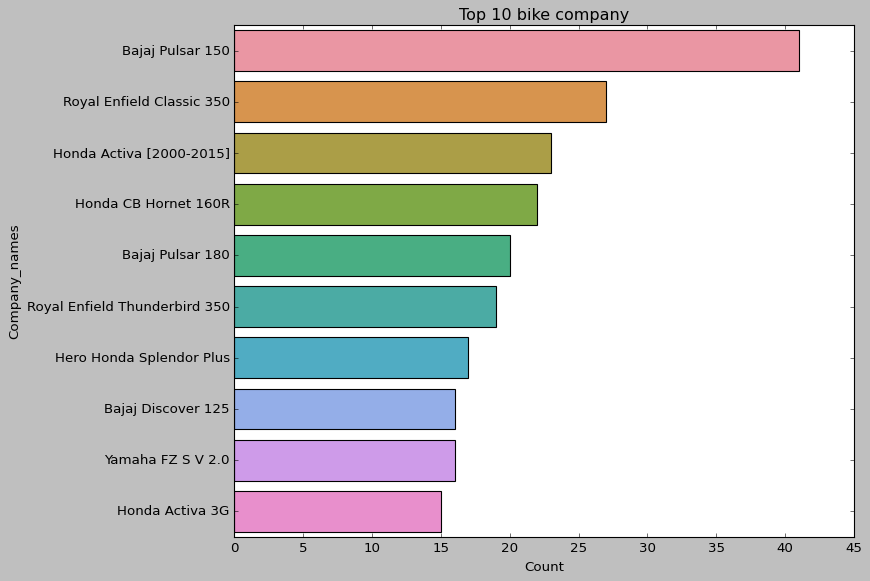

In [34]:
top_company_bikes = df['name'].value_counts().head(10)
plt.figure(figsize = (10,8))
sns.barplot(x = top_company_bikes, y = top_company_bikes.index)
plt.xlabel('Count')
plt.ylabel('Company_names')
plt.title('Top 10 bike company');

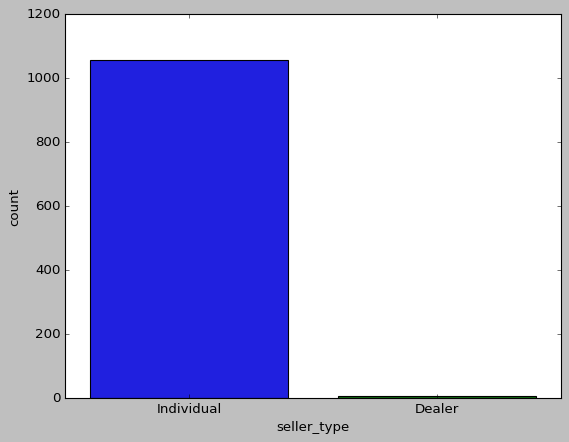

In [37]:
sns.countplot(x = df['seller_type'], data = df);

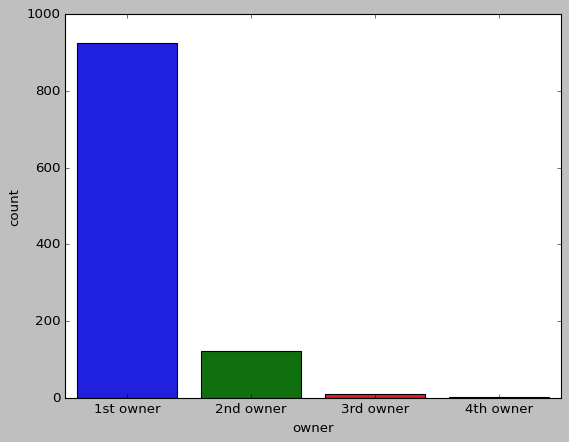

In [38]:
sns.countplot(x = df['owner'], data = df);

<AxesSubplot:ylabel='Density'>

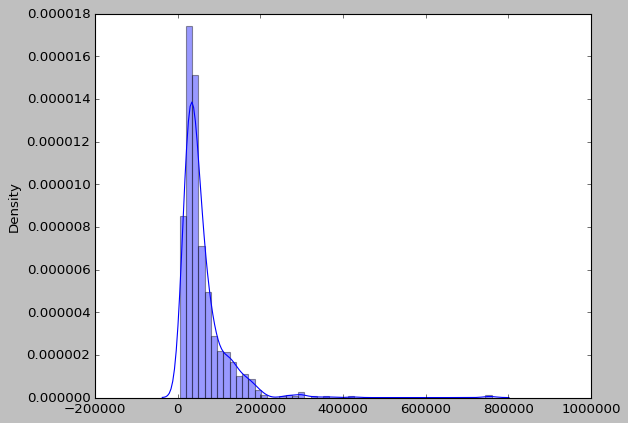

In [41]:
sns.distplot(x = df['selling_price'])

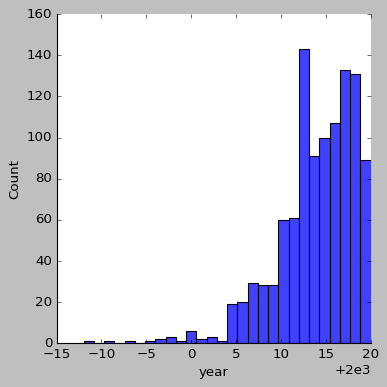

In [54]:
sns.displot(df['year']);

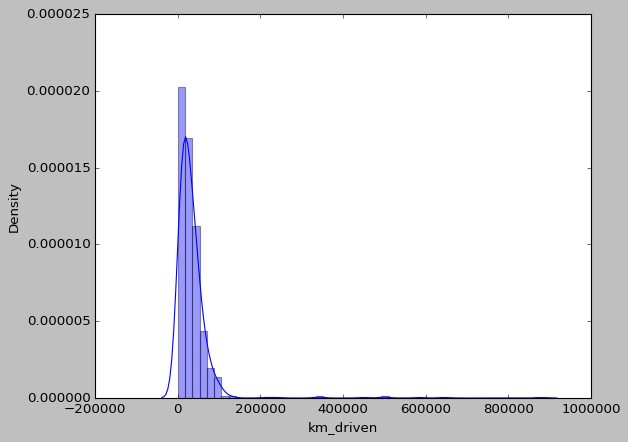

In [58]:
sns.distplot(df['km_driven']);

In [45]:
Highest_bike_purchased_year = df['year'].value_counts().head(10)
Highest_bike_purchased_year

2017    133
2018    131
2016    107
2015    100
2014     91
2019     86
2013     73
2012     70
2011     61
2010     60
Name: year, dtype: int64

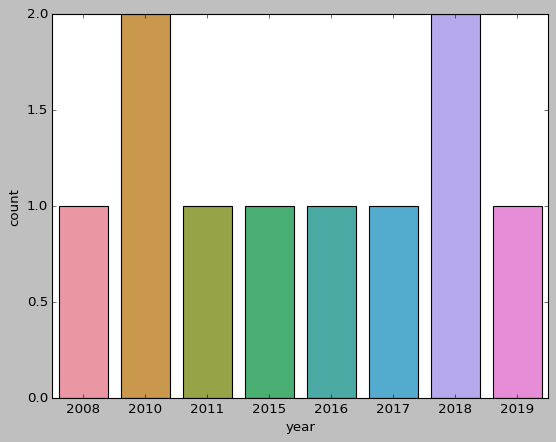

In [53]:
sns.countplot(x = df['year'].head(10));

In [59]:
df['ex_showroom_price'].fillna(np.round(df['ex_showroom_price'].mean(), 2), inplace = True)

In [65]:
df['ex_showroom_price']

0        87958.71
1        87958.71
2       148114.00
3        89643.00
4        87958.71
          ...    
1056     52000.00
1057     51000.00
1058     57000.00
1059     58000.00
1060     75000.00
Name: ex_showroom_price, Length: 1061, dtype: float64

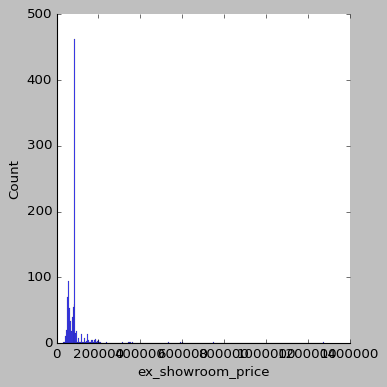

In [64]:
sns.displot(x = df['ex_showroom_price']);

In [40]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'brand'],
      dtype='object')